In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

%matplotlib inline
#matplotib notebook

<font color="red">Actividad</font>

* Explora el conjunto de datos $\texttt{df_disc_2.csv}$
* Aplica la técnica de **discriminantes lineales** para encontrar las fronteras entre cada pareja de clases (3 clases)

## df_disc_2

In [59]:
df = pd.read_csv('df_disc_2.csv', header=0) # Leer el archivo csv

df = df.drop(['Unnamed: 0'], axis=1) # Eliminar columna "inecesaria" ?

df.head() 

,x1,x2,y
0,6.624098,0.738611,2
1,0.851395,3.488259,1
2,5.379887,2.717840,2
3,-2.643119,6.866325,1
4,-2.328890,4.786413,1


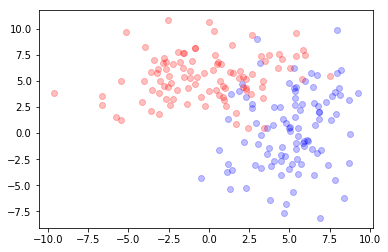

In [60]:
# Quedarme con todos los valores de las clases (sin repetir)
clases = df.y.unique() 

# Dividir mi subconjunto de clases
X1 = df.loc[(df.y == clases[0])]
X2 = df.loc[(df.y == clases[1])]

# Mostrar todo nuestro conjunto de datos, segun la clase
plt.plot(X1.x1,X1.x2,'bo', alpha=0.25)
plt.plot(X2.x1,X2.x2,'ro', alpha=0.25)
plt.show()

## Estimación de parámetros

En la práctica, los parámetros de las clases son desconocidos y deben estimarse a partir de las observaciones:

\begin{align}
    \widehat{\pi}_k &= \frac{N_k}{N}\\
\end{align}

In [61]:
pi_k = [] # Escalar

for i in clases:
    n = ((df.y == i).sum()) / float(len(df))
    pi_k.append(n)
    
pi_k 

[0.5, 0.5]


\begin{align}
    \widehat{\mu}_k &= \frac{\sum_{i|y_i=l_k}x_i}{N_k}\\ 
\end{align}

In [62]:
mu_k = [] # Tamaño d x 1

for i in clases:
    sub = df.loc[(df.y == i)]
    
    X1_s = sub.x1.sum()
    X2_s = sub.x2.sum()
    
    mu = [X1_s, X2_s]
    mu = np.true_divide(mu, (df.y == i).sum())
    #mu = mu // float((df.y == i).sum())
    
    mu_k.append(mu)
    
mu_k

[array([5.12481946, 0.28303641]), array([-0.2163616 ,  5.39075695])]

In [63]:
mu_k[1]
#mu_k[0][0]

array([-0.2163616 ,  5.39075695])


\begin{align}   
    \widehat{\Sigma} &= \sum_{k=1}^{K}\sum_{i|y_i=k}(x_i-\widehat{\mu}_k)(x_i-\widehat{\mu}_k)^{T}/(N-K) 
\end{align}

In [65]:
# 2 matrrices de covarianza

cov_matrix = [] # Tamaño d x d

for i in range(0,2):
    sub = df.loc[(df.y == clases[i])]
    sub = sub.reset_index()
    
    for j in range(0,len(sub)):
        #cont = cont + 1
        #print sub.x1[cont],sub.x2[cont]
        X = [sub.x1[j], sub.x2[j]]
       
        const = X - mu_k[i]

        #print const
        n =  np.reshape(const, (1, 2)) # Vector Fila

        t = np.reshape(const, (2, 1)) # Vector Columna
    
        numerador = np.dot(t, n) # Producto Punto
        #print numerador
        #print "--"
        
    denominador = len(df) - len(clases)
    
    S = np.true_divide(numerador, denominador)
    #mu = np.true_divide(mu, (df.y == i).sum())
    #mu = mu // float((df.y == i).sum())
    
    cov_matrix.append(S)
    
cov_matrix

[array([[0.0180611 , 0.03506491],
        [0.03506491, 0.06807715]]), array([[ 2.53799552e-02, -1.01798445e-03],
        [-1.01798445e-03,  4.08311333e-05]])]

In [68]:
cov_matrix[0]
#cov_matrix[0][0,0]

array([[0.0180611 , 0.03506491],
       [0.03506491, 0.06807715]])

Tomando esta última, podemos comparar las probabilidades de parejas de clases tomando el logaritmo de su razón:

$$\color{blue}{\log{\frac{P(Y=l_i \;|\; X=x)}{P(Y=l_j \;|\; X=x)}} = \log{\frac{\pi_i}{\pi_j}}-\frac{1}{2}(\mu_i+\mu_j)^{T}\Sigma^{-1}(\mu_i-\mu_j)+x^{T}\Sigma^{-1}(\mu_i-\mu_j)}$$

Los puntos del espacio en los que esta expresión es cero representan las fronteras entre clases, **las cuales son lineales**.

**Ejemplo**

Para los datos que construimos más arriba, la frontera entre las dos clases está dada por la ecuación:

\begin{align}
      \log{\frac{\pi_i}{\pi_j}}+(\mu_i+\mu_j)^{T}\Sigma^{-1}(\mu_i-\mu_j)+x^{T}\Sigma^{-1}(\mu_i-\mu_j) &=0\\
      &\\
      \color{red}{x_1-x_2}&\color{red}{=0}
\end{align}

In [85]:
def lin_c(type):
    
    x1 = []
    
    for i in range(-10,10):
        
        if type==1: # Clase 
            
            var1 = 76631844*(i**2)
            var2 = 779041132*i
            
            sq = np.sqrt(var1-var2+1968980049)
            
            var3 = 10438*i
            
            numerador = -sq+var3+98743
            denominador = 20000
            
            resultado = numerador/denominador
            
            x1.append(resultado)
            
    return x1

C:\Users\cmces\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


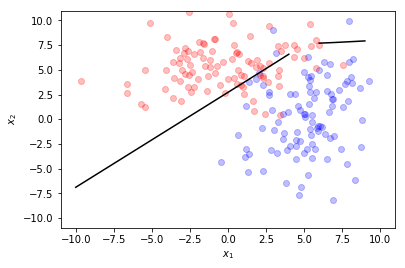

In [86]:
c = lin_c(1)
inde = range(-10,10)

# Dividir mi subconjunto de clases
X1 = df.loc[(df.y == clases[0])]
X2 = df.loc[(df.y == clases[1])]

# Mostrar todo nuestro conjunto de datos, segun la clase
plt.plot(X1.x1,X1.x2,'bo', alpha=0.25)
plt.plot(X2.x1,X2.x2,'ro', alpha=0.25)

plt.plot(inde, c, 'k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axis([-11, 11, -11, 11]) # Fijar limites
plt.show()

## lda_data

In [2]:
df = pd.read_csv('lda_data.csv', header=None, names=["x1", "x2", "y"], sep=' ') # Leer el archivo csv

#clases = lda.2.unique() # Quedarme con todos los valores de las clases (sin repetir)

df.head()

,x1,x2,y
0,1.412897,5.015043,1.0
1,7.479694,2.721120,1.0
2,1.063656,6.582988,1.0
3,8.427866,3.679405,1.0
4,4.483817,3.732147,1.0


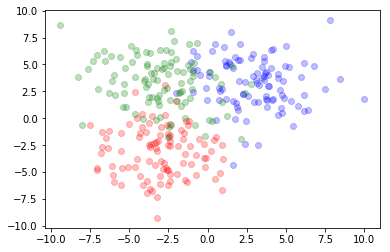

In [3]:
# Quedarme con todos los valores de las clases (sin repetir)
clases = df.y.unique() 

# Dividir mi subconjunto de clases
X1 = df.loc[(df.y == clases[0])]
X2 = df.loc[(df.y == clases[1])]
X3 = df.loc[(df.y == clases[2])]

# Mostrar todo nuestro conjunto de datos, segun la clase
plt.plot(X1.x1,X1.x2,'bo', alpha=0.25)
plt.plot(X2.x1,X2.x2,'ro', alpha=0.25)
plt.plot(X3.x1,X3.x2,'go', alpha=0.25)
plt.show()

## Estimación de parámetros

En la práctica, los parámetros de las clases son desconocidos y deben estimarse a partir de las observaciones:

\begin{align}
    \widehat{\pi}_k &= \frac{N_k}{N}\\
\end{align}

In [4]:
prob_k = [] # Escalar

for i in clases:
    n = ((df.y == i).sum()) / float(len(df))
    prob_k.append(n)
    
prob_k 

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


\begin{align}
    \widehat{\mu}_k &= \frac{\sum_{i|y_i=l_k}x_i}{N_k}\\ 
\end{align}

In [5]:
mu_k = [] # Tamaño d x 1

for i in clases:
    sub = df.loc[(df.y == i)]
    
    X1_s = sub.x1.sum()
    X2_s = sub.x2.sum()
    
    mu = [X1_s, X2_s]
    mu = np.true_divide(mu, (df.y == i).sum())
    #mu = mu // float((df.y == i).sum())
    
    mu_k.append(mu)
    
mu_k

[array([2.95401963, 3.27375169]),
 array([-3.02582593, -3.1501613 ]),
 array([-3.00966552,  3.32620324])]


\begin{align}   
    \widehat{\Sigma} &= \sum_{k=1}^{K}\sum_{i|y_i=k}(x_i-\widehat{\mu}_k)(x_i-\widehat{\mu}_k)^{T}/(N-K) 
\end{align}

In [8]:
#Misma matriz para todos los datos
numerador = np.zeros((2,2))

for i in range(0,len(clases)):
    sub = df.loc[(df.y == clases[i])]
    sub = sub.reset_index()
    #print "\n clase = ", clases[i]
    for j in range(0,len(sub)):
        #cont = cont + 1
        #print sub.x1[cont],sub.x2[cont]
        X = [sub.x1[j], sub.x2[j]]
       
        const = X -  mu_k[i]
        #print X, " - ", mu_k[i], " = ", const
        n =  np.reshape(const, (1, 2)) # Vector Fila

        t = np.reshape(const, (2, 1)) # Vector Columna

        nume = np.dot(t, n) # Producto Punto
        #print nume
        
        numerador = numerador + nume # Sumar las matrices


denominador = len(df) - len(clases)

cov_matrix = np.true_divide(numerador, denominador)
cov_matrix

array([[ 5.00922496, -0.71316683],
       [-0.71316683,  5.23042949]])

Tomando esta última, podemos comparar las probabilidades de parejas de clases tomando el logaritmo de su razón:

$$\color{blue}{\log{\frac{P(Y=l_i \;|\; X=x)}{P(Y=l_j \;|\; X=x)}} = \log{\frac{\pi_i}{\pi_j}}-\frac{1}{2}(\mu_i+\mu_j)^{T}\Sigma^{-1}(\mu_i-\mu_j)+x^{T}\Sigma^{-1}(\mu_i-\mu_j)}$$

Los puntos del espacio en los que esta expresión es cero representan las fronteras entre clases, **las cuales son lineales**.

**Ejemplo**

Para los datos que construimos más arriba, la frontera entre las dos clases está dada por la ecuación:

\begin{align}
      \log{\frac{\pi_i}{\pi_j}}-\frac{1}{2}(\mu_i+\mu_j)^{T}\Sigma^{-1}(\mu_i-\mu_j)+x^{T}\Sigma^{-1}(\mu_i-\mu_j) &=0\\
\end{align}

In [55]:
def lin(type):
    
    x2 = []
    
    for i in range(-10,10):
        
        if type==1: # Clase 1 y 2
            y = ((-1.38525*i)+0.0359)/1.40667
            x2.append(y)
            
        if type==2: # Clase 1 y 3
            y = ((-1.2065*i)+0.4672)/0.1509
            x2.append(y)
        
        if type==3: # Clase 2 y 3
            y = ((0.1787*i)+0.4313)/(-1.2557)
            x2.append(y)
            
    return x2

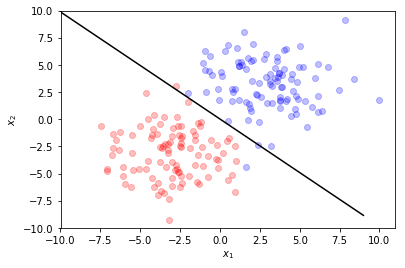

In [58]:
# Calcular los valores de la linea
c12 = lin(1)
inde = range(-10,10)

# Dividir mi subconjunto de clases entre la clase 1 y 2
X1 = df.loc[(df.y == clases[0])]
X2 = df.loc[(df.y == clases[1])]

# Mostrar todo nuestro conjunto de datos, segun la clase
plt.plot(X1.x1,X1.x2,'bo', alpha=0.25)
plt.plot(X2.x1,X2.x2,'ro', alpha=0.25)

plt.plot(inde,c12, 'k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axis([-11, 11, -11, 11]) # Fijar limites
plt.show()

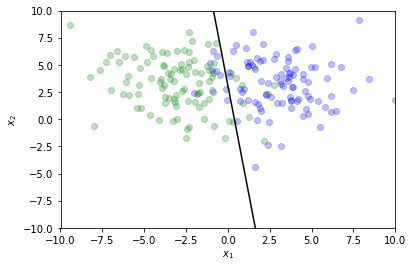

In [53]:
# Calcular los valores de la linea
c13 = lin(2)
inde = range(-10,10)

# Dividir mi subconjunto de clases entre la clase 1 y 2
X1 = df.loc[(df.y == clases[0])]
X2 = df.loc[(df.y == clases[2])]

# Mostrar todo nuestro conjunto de datos, segun la clase
plt.plot(X1.x1,X1.x2,'bo', alpha=0.25)
plt.plot(X2.x1,X2.x2,'go', alpha=0.25)

plt.plot(inde, c13, 'k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axis([-11, 11, -11, 11]) # Fijar limites
plt.show()

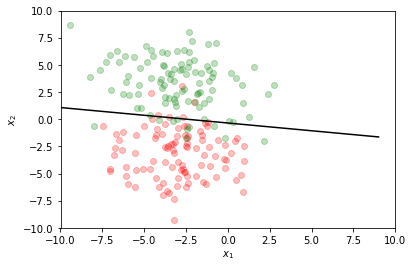

In [56]:
# Calcular los valores de la linea
c23 = lin(3)
inde = range(-10,10)

# Dividir mi subconjunto de clases entre la clase 1 y 2
X1 = df.loc[(df.y == clases[1])]
X2 = df.loc[(df.y == clases[2])]

# Mostrar todo nuestro conjunto de datos, segun la clase
plt.plot(X1.x1,X1.x2,'ro', alpha=0.25)
plt.plot(X2.x1,X2.x2,'go', alpha=0.25)

plt.plot(inde, c23, 'k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axis([-11, 11, -11, 11]) # Fijar limites
plt.show()

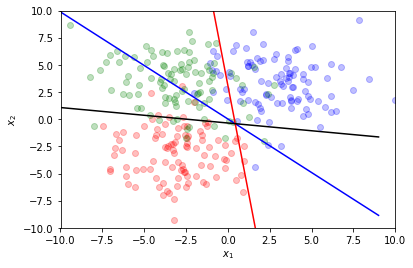

In [57]:
# Dividir mi subconjunto de clases
X1 = df.loc[(df.y == clases[0])]
X2 = df.loc[(df.y == clases[1])]
X3 = df.loc[(df.y == clases[2])]

# Mostrar todo nuestro conjunto de datos, segun la clase
plt.plot(X1.x1,X1.x2,'bo', alpha=0.25)
plt.plot(X2.x1,X2.x2,'ro', alpha=0.25)
plt.plot(X3.x1,X3.x2,'go', alpha=0.25)

plt.plot(inde,c12, 'b') # Corta os azules y los rojos (clases 1 y 2)
plt.plot(inde, c13, 'r') # Corta los azules y los verdes (clases 1 y 3)
plt.plot(inde, c23, 'k') # Corta los rojos y los verdes (clases 2 y 3)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axis([-11, 11, -11, 11]) # Fijar limites
plt.show()